In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
#Load the dataset saved in the current working directory
#It has one item per transaction
groceries = pd.read_csv("Groceries_dataset.csv")

In [3]:
#Look at the data
print(groceries.head())
print(groceries.shape)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
(38765, 3)


In [4]:
#clean data
print(groceries.isna().sum())

Member_number      0
Date               0
itemDescription    0
dtype: int64


In [5]:
#Get all the transactions as a list 
#of items purchased by same member number on one particular date
#all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]
#print(len(all_transactions))
#transaction[1]['itemDescription']
#Selects the itemDescription column from the grouped DataFrame.
#groceries.groupby(['Member_number', 'Date'])
#The groceries DataFrame is grouped by Member_number and Date.
#Each group represents all the items purchased by one member on one date.
grouped = groceries.groupby(['Member_number', 'Date'])['itemDescription']
all_transactions = grouped.apply(list).tolist()

In [6]:
all_transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [7]:
#Encoding dataset in boolean encoded vector
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)

In [8]:
#Making data frame
trans_encoder_matrix_df = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)


In [9]:
trans_encoder_matrix_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Applying FP Growth algorithm accepts transaction encoded df
fp_matrix = fpgrowth(trans_encoder_matrix_df, min_support=0.01,  use_colnames=True)
fp_matrix['number_of_items'] = fp_matrix['itemsets'].apply(lambda x: len(x))
print(fp_matrix)

     support                        itemsets  number_of_items
0   0.157923                    (whole milk)                1
1   0.085879                        (yogurt)                1
2   0.060349                       (sausage)                1
3   0.051728                        (pastry)                1
4   0.018780                   (salty snack)                1
..       ...                             ...              ...
64  0.011161            (yogurt, whole milk)                2
65  0.011629              (whole milk, soda)                2
66  0.013968        (whole milk, rolls/buns)                2
67  0.010559  (other vegetables, rolls/buns)                2
68  0.014837  (other vegetables, whole milk)                2

[69 rows x 3 columns]


In [11]:
# Find frequent itemsets with at least 5% support (adjust as needed)
frequent_itemsets = fpgrowth(trans_encoder_matrix_df, min_support=0.05, use_colnames=True)
#first parameter may be a df of logical values

# Sort by support (most common first)
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# Show top 10 frequent label patterns
print(frequent_itemsets.head(30))

     support            itemsets
0   0.157923        (whole milk)
6   0.122101  (other vegetables)
5   0.110005        (rolls/buns)
4   0.097106              (soda)
1   0.085879            (yogurt)
8   0.069572   (root vegetables)
7   0.067767    (tropical fruit)
9   0.060683     (bottled water)
2   0.060349           (sausage)
10  0.053131      (citrus fruit)
3   0.051728            (pastry)


In [12]:
#save frequent itemsets in csv
freq_item_df=pd.DataFrame(frequent_itemsets)
freq_item_df.to_csv("freq_item_05_min_sup.csv",index=False)

In [13]:
freq_item_df

,support,itemsets
0,0.157923,(whole milk)
6,0.122101,(other vegetables)
5,0.110005,(rolls/buns)
4,0.097106,(soda)
1,0.085879,(yogurt)
8,0.069572,(root vegetables)
7,0.067767,(tropical fruit)
9,0.060683,(bottled water)
2,0.060349,(sausage)
10,0.053131,(citrus fruit)


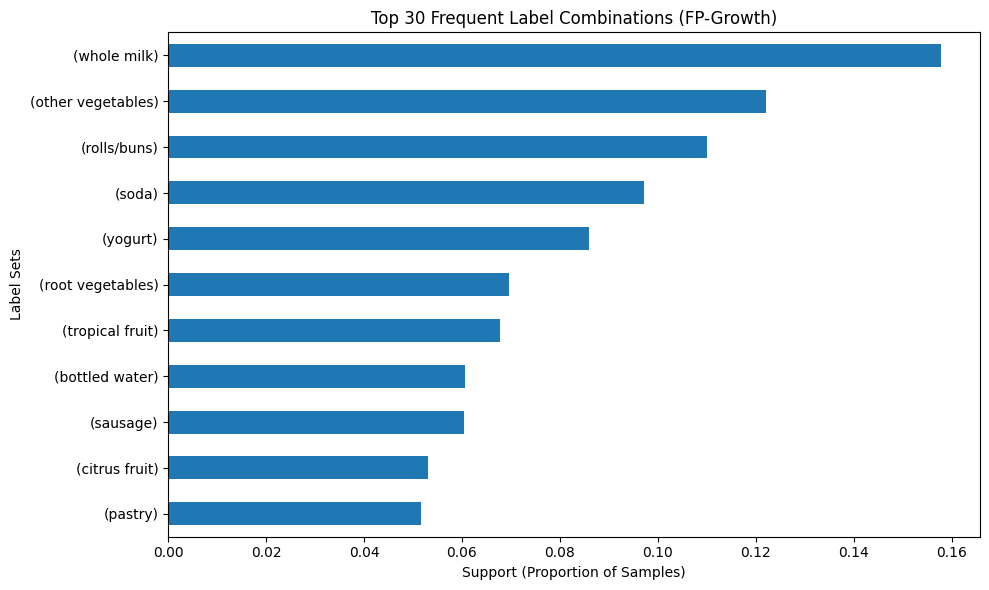

In [14]:
import matplotlib.pyplot as plt

top_n = 30
frequent_itemsets.head(top_n).plot(
    x='itemsets', y='support', kind='barh', figsize=(10, 6), legend=False)
plt.xlabel("Support (Proportion of Samples)")
plt.ylabel("Label Sets")
plt.title(f"Top {top_n} Frequent Label Combinations (FP-Growth)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(fp_matrix, metric="lift", min_threshold=0.001)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

    antecedents   consequents   support  confidence      lift
0      (yogurt)  (whole milk)  0.011161    0.129961  0.822940
1  (whole milk)      (yogurt)  0.011161    0.070673  0.822940
2  (whole milk)        (soda)  0.011629    0.073635  0.758296
3        (soda)  (whole milk)  0.011629    0.119752  0.758296
4  (whole milk)  (rolls/buns)  0.013968    0.088447  0.804028


: 

In [19]:
#Generating Association Rules using frequent patterns obtained from FP Growth
fp_rules_lift = association_rules(fp_matrix,  metric='lift',  min_threshold=0.7)
fp_rules_lift.to_csv('Fpgrowth_rules1.csv',index=False)
print(fp_rules_lift)

          antecedents         consequents  antecedent support  \
0            (yogurt)        (whole milk)            0.085879   
1        (whole milk)            (yogurt)            0.157923   
2        (whole milk)              (soda)            0.157923   
3              (soda)        (whole milk)            0.097106   
4        (whole milk)        (rolls/buns)            0.157923   
5        (rolls/buns)        (whole milk)            0.110005   
6  (other vegetables)        (rolls/buns)            0.122101   
7        (rolls/buns)  (other vegetables)            0.110005   
8  (other vegetables)        (whole milk)            0.122101   
9        (whole milk)  (other vegetables)            0.157923   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.157923  0.011161    0.129961  0.822940 -0.002401    0.967861   
1            0.085879  0.011161    0.070673  0.822940 -0.002401    0.983638   
2            0.097106  0.011629    0.073635  0.

In [20]:
fp_rules_lift_df=pd.DataFrame(fp_rules_lift)

In [21]:
fp_rules_lift_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
2,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461


https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ 
Lift: range: [0,∞]
Measures how much more likely the consequent is to occur when the antecedent is present, compared to when it's not.
Lift > 1: Antecedent and consequent are positively correlated (occur together more often than expected).
Lift = 1: Antecedent and consequent are independent.
Lift < 1: Antecedent and consequent are negatively correlated (occur together less often than expected).
Calculation: lift(A -> B) = support(A U B) / (support(A) * support(B))

In [32]:
#null-invariant measures in the association_rules
#fp_rules_kulczynski = association_rules(fp_matrix,  metric='kulczynski', min_threshold=0.2)
fp_rules_leverage = association_rules(fp_matrix,  metric='leverage', min_threshold=0.3)
fp_rules_conviction = association_rules(fp_matrix,  metric='conviction', min_threshold=0.3)
fp_rules_zhangs = association_rules(fp_matrix,  metric='zhangs_metric', min_threshold=0.01)


Leverage: range: [−1,1]
The difference between the observed support of a rule and the support that would be expected if the antecedent and consequent were independent.
Interpretation: Similar to Lift, it indicates the deviation from independence, but in an absolute sense rather than a ratio.
Calculation: leverage(A -> B) = support(A U B) - (support(A) * support(B))

Conviction: range: [0,∞]
Measures the implication strength of a rule, indicating how much the consequent depends on the antecedent.
Interpretation: A high conviction value suggests that the consequent is highly dependent on the antecedent, and the rule is strong.
Calculation: conviction(A -> B) = (1 - support(B)) / (1 - confidence(A -> B))

'zhangs_metric': range: [−1,1]
zhangs metric(A→C)=[confidence(A→C)−confidence(A′→C)]/Max[confidence(A→C),confidence(A′→C)],
Measures both association and dissociation. 
Value ranges between -1 and 1. 
A positive value (>0) indicates Association and negative value indicated dissociation.

In [33]:
fp_rules_zhangs

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [36]:
#Calculate Kulczynski manually using its formula 
rules_df = association_rules(fp_matrix, metric='confidence', min_threshold=0.001)
# Kulczynski = 0.5 * (confidence + support / consequence_support)
rules_df['kulczynski'] = 0.5 * ((rules_df['confidence']) +(rules_df['support'] / rules_df['consequent support']))
# Now you can filter or sort by 'kulczynski' as needed


In [37]:
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508,0.100317
2,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587,0.096694
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091,0.091235
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477,0.107730
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461,0.107730


In [38]:
# Sort by Kulczynski in descending order (top rules first)
sorted_rules = rules_df.sort_values('kulczynski', ascending=False)


In [39]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,kulczynski
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461,0.107730
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477,0.107730
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986,0.107711
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474,0.107711
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508,0.100317
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525,0.100317
2,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587,0.096694
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917,0.096694
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091,0.091235
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553,0.091235


In [40]:
# Filter rules with Kulczynski ≥ 0.7
filtered_rules_kulc = rules_df[rules_df['kulczynski'] >= 0.1]


In [41]:
filtered_rules_kulc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508,0.100317
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986,0.107711
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477,0.107730
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461,0.107730


In [17]:
#Similarly, for confidence metric, generate the association rules
fp_rules_conf = association_rules(fp_matrix, metric="confidence", min_threshold=0.1)
fp_rules_conf.to_csv('Fpgrowth_rules2.csv',index=False)
print(fp_rules_conf)

          antecedents   consequents  antecedent support  consequent support  \
0            (yogurt)  (whole milk)            0.085879            0.157923   
1              (soda)  (whole milk)            0.097106            0.157923   
2        (rolls/buns)  (whole milk)            0.110005            0.157923   
3  (other vegetables)  (whole milk)            0.122101            0.157923   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011161    0.129961  0.822940 -0.002401    0.967861      -0.190525  
1  0.011629    0.119752  0.758296 -0.003707    0.956636      -0.260917  
2  0.013968    0.126974  0.804028 -0.003404    0.964550      -0.214986  
3  0.014837    0.121511  0.769430 -0.004446    0.958551      -0.254477  


In [43]:
#Now applying Apriori algorithm on the same dataset
apriori_matrix = apriori(trans_encoder_matrix_df,  min_support=0.01, use_colnames=True)
apriori_matrix['number_of_items'] = apriori_matrix['itemsets'].apply(lambda x: len(x))
print(apriori_matrix)

     support                        itemsets  number_of_items
0   0.021386                      (UHT-milk)                1
1   0.033950                          (beef)                1
2   0.021787                       (berries)                1
3   0.016574                     (beverages)                1
4   0.045312                  (bottled beer)                1
..       ...                             ...              ...
64  0.010559  (other vegetables, rolls/buns)                2
65  0.014837  (other vegetables, whole milk)                2
66  0.013968        (whole milk, rolls/buns)                2
67  0.011629              (whole milk, soda)                2
68  0.011161            (yogurt, whole milk)                2

[69 rows x 3 columns]


In [44]:
#Generating Association rules with a certain minimum threshold for 'lift'
apr_rules_lift = association_rules(apriori_matrix, metric='lift', min_threshold=0.1)
apr_rules_lift.to_csv('Apriori_rules1.csv',index=False)
print(apr_rules_lift)

          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122101   
1        (rolls/buns)  (other vegetables)            0.110005   
2  (other vegetables)        (whole milk)            0.122101   
3        (whole milk)  (other vegetables)            0.157923   
4        (whole milk)        (rolls/buns)            0.157923   
5        (rolls/buns)        (whole milk)            0.110005   
6        (whole milk)              (soda)            0.157923   
7              (soda)        (whole milk)            0.097106   
8            (yogurt)        (whole milk)            0.085879   
9        (whole milk)            (yogurt)            0.157923   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.110005  0.010559    0.086481  0.786154 -0.002872    0.974249   
1            0.122101  0.010559    0.095990  0.786154 -0.002872    0.971117   
2            0.157923  0.014837    0.121511  0.

In [45]:
#Generating Association rules with a certain minimum threshold for 'confidence'
apr_rules_conf= association_rules(apriori_matrix, metric="confidence", min_threshold=0.1)
apr_rules_conf.to_csv('Apriori_rules2.csv',index=False)
print(apr_rules_conf)

          antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.122101            0.157923   
1        (rolls/buns)  (whole milk)            0.110005            0.157923   
2              (soda)  (whole milk)            0.097106            0.157923   
3            (yogurt)  (whole milk)            0.085879            0.157923   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.014837    0.121511  0.769430 -0.004446    0.958551      -0.254477  
1  0.013968    0.126974  0.804028 -0.003404    0.964550      -0.214986  
2  0.011629    0.119752  0.758296 -0.003707    0.956636      -0.260917  
3  0.011161    0.129961  0.822940 -0.002401    0.967861      -0.190525  
